# CBOW in Keras

In [ ]:
import numpy as np

import keras.backend as K
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

import gensim
import nltk

from IPython.display import SVG

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')

In [13]:
sentents = [" ".join(s) for s in nltk.corpus.gutenberg.sents("carroll-alice.txt") if len(s) > 2]

In [14]:
sentents[10]

'The rabbit - hole went straight on like a tunnel for some way , and then dipped suddenly down , so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well .'

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentents)
corpus = tokenizer.texts_to_sequences(sentents)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1
dim = 100
window_size = 2

<img src="http://www.claudiobellei.com/2018/01/07/backprop-word2vec-python/corpus2io.png">

In [16]:
def generate_data(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels = []
            s = index - window_size
            e = index + window_size + 1

            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)

            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [17]:
X = []
Y = []
for x, y in generate_data(corpus, window_size, V):
    X.append(x)
    Y.append(y)

X = np.concatenate(X)
Y = np.concatenate(Y)

In [18]:
X.shape, Y.shape

((30179, 4), (30179, 2572))

In [19]:
X[2], np.nonzero(Y[2])

(array([ 12,   1, 475,  13], dtype=int32), (array([20]),))

In [20]:
X[3], np.nonzero(Y[3])

(array([  1,  20,  13, 831], dtype=int32), (array([475]),))

## Model

In [29]:
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [30]:
%%time
hist = cbow.fit(X, Y, epochs=1000, batch_size=300, verbose=2)

Epoch 1/1000
 - 1s - loss: 7.7870 - acc: 0.0780
Epoch 2/1000
 - 1s - loss: 7.3832 - acc: 0.0957
Epoch 3/1000
 - 1s - loss: 6.9438 - acc: 0.0971
Epoch 4/1000
 - 1s - loss: 6.6046 - acc: 0.1013
Epoch 5/1000
 - 1s - loss: 6.3674 - acc: 0.1071
Epoch 6/1000
 - 1s - loss: 6.1999 - acc: 0.1124
Epoch 7/1000
 - 1s - loss: 6.0769 - acc: 0.1215
Epoch 8/1000
 - 1s - loss: 5.9818 - acc: 0.1305
Epoch 9/1000
 - 1s - loss: 5.9034 - acc: 0.1367
Epoch 10/1000
 - 1s - loss: 5.8360 - acc: 0.1401
Epoch 11/1000
 - 1s - loss: 5.7773 - acc: 0.1433
Epoch 12/1000
 - 1s - loss: 5.7257 - acc: 0.1452
Epoch 13/1000
 - 1s - loss: 5.6791 - acc: 0.1472
Epoch 14/1000
 - 1s - loss: 5.6366 - acc: 0.1484
Epoch 15/1000
 - 1s - loss: 5.5972 - acc: 0.1501
Epoch 16/1000
 - 1s - loss: 5.5605 - acc: 0.1516
Epoch 17/1000
 - 1s - loss: 5.5259 - acc: 0.1531
Epoch 18/1000
 - 1s - loss: 5.4928 - acc: 0.1553
Epoch 19/1000
 - 1s - loss: 5.4615 - acc: 0.1561
Epoch 20/1000
 - 1s - loss: 5.4314 - acc: 0.1594
Epoch 21/1000
 - 1s - loss: 5

 - 1s - loss: 3.6637 - acc: 0.3312
Epoch 168/1000
 - 1s - loss: 3.6566 - acc: 0.3330
Epoch 169/1000
 - 1s - loss: 3.6495 - acc: 0.3346
Epoch 170/1000
 - 1s - loss: 3.6424 - acc: 0.3343
Epoch 171/1000
 - 1s - loss: 3.6352 - acc: 0.3348
Epoch 172/1000
 - 1s - loss: 3.6284 - acc: 0.3354
Epoch 173/1000
 - 1s - loss: 3.6213 - acc: 0.3371
Epoch 174/1000
 - 1s - loss: 3.6143 - acc: 0.3375
Epoch 175/1000
 - 1s - loss: 3.6075 - acc: 0.3384
Epoch 176/1000
 - 1s - loss: 3.6005 - acc: 0.3386
Epoch 177/1000
 - 1s - loss: 3.5936 - acc: 0.3397
Epoch 178/1000
 - 1s - loss: 3.5867 - acc: 0.3407
Epoch 179/1000
 - 1s - loss: 3.5800 - acc: 0.3409
Epoch 180/1000
 - 1s - loss: 3.5732 - acc: 0.3412
Epoch 181/1000
 - 1s - loss: 3.5661 - acc: 0.3424
Epoch 182/1000
 - 1s - loss: 3.5592 - acc: 0.3424
Epoch 183/1000
 - 1s - loss: 3.5527 - acc: 0.3439
Epoch 184/1000
 - 1s - loss: 3.5461 - acc: 0.3437
Epoch 185/1000
 - 1s - loss: 3.5394 - acc: 0.3443
Epoch 186/1000
 - 1s - loss: 3.5325 - acc: 0.3453
Epoch 187/1000


 - 1s - loss: 2.7289 - acc: 0.4410
Epoch 332/1000
 - 1s - loss: 2.7241 - acc: 0.4414
Epoch 333/1000
 - 1s - loss: 2.7199 - acc: 0.4434
Epoch 334/1000
 - 1s - loss: 2.7151 - acc: 0.4422
Epoch 335/1000
 - 1s - loss: 2.7105 - acc: 0.4443
Epoch 336/1000
 - 1s - loss: 2.7060 - acc: 0.4443
Epoch 337/1000
 - 1s - loss: 2.7011 - acc: 0.4452
Epoch 338/1000
 - 1s - loss: 2.6969 - acc: 0.4455
Epoch 339/1000
 - 1s - loss: 2.6921 - acc: 0.4455
Epoch 340/1000
 - 1s - loss: 2.6877 - acc: 0.4467
Epoch 341/1000
 - 1s - loss: 2.6830 - acc: 0.4473
Epoch 342/1000
 - 1s - loss: 2.6788 - acc: 0.4481
Epoch 343/1000
 - 1s - loss: 2.6740 - acc: 0.4487
Epoch 344/1000
 - 1s - loss: 2.6696 - acc: 0.4497
Epoch 345/1000
 - 1s - loss: 2.6653 - acc: 0.4494
Epoch 346/1000
 - 1s - loss: 2.6613 - acc: 0.4496
Epoch 347/1000
 - 1s - loss: 2.6564 - acc: 0.4514
Epoch 348/1000
 - 1s - loss: 2.6521 - acc: 0.4505
Epoch 349/1000
 - 1s - loss: 2.6473 - acc: 0.4517
Epoch 350/1000
 - 1s - loss: 2.6429 - acc: 0.4517
Epoch 351/1000


 - 1s - loss: 2.1026 - acc: 0.5345
Epoch 496/1000
 - 1s - loss: 2.0993 - acc: 0.5339
Epoch 497/1000
 - 1s - loss: 2.0965 - acc: 0.5346
Epoch 498/1000
 - 1s - loss: 2.0933 - acc: 0.5342
Epoch 499/1000
 - 1s - loss: 2.0901 - acc: 0.5370
Epoch 500/1000
 - 1s - loss: 2.0870 - acc: 0.5351
Epoch 501/1000
 - 1s - loss: 2.0839 - acc: 0.5359
Epoch 502/1000
 - 1s - loss: 2.0810 - acc: 0.5366
Epoch 503/1000
 - 1s - loss: 2.0779 - acc: 0.5383
Epoch 504/1000
 - 1s - loss: 2.0749 - acc: 0.5368
Epoch 505/1000
 - 1s - loss: 2.0716 - acc: 0.5396
Epoch 506/1000
 - 1s - loss: 2.0688 - acc: 0.5389
Epoch 507/1000
 - 1s - loss: 2.0657 - acc: 0.5404
Epoch 508/1000
 - 1s - loss: 2.0627 - acc: 0.5403
Epoch 509/1000
 - 1s - loss: 2.0596 - acc: 0.5401
Epoch 510/1000
 - 1s - loss: 2.0566 - acc: 0.5411
Epoch 511/1000
 - 1s - loss: 2.0537 - acc: 0.5418
Epoch 512/1000
 - 1s - loss: 2.0504 - acc: 0.5430
Epoch 513/1000
 - 1s - loss: 2.0476 - acc: 0.5423
Epoch 514/1000
 - 1s - loss: 2.0448 - acc: 0.5432
Epoch 515/1000


 - 1s - loss: 1.6808 - acc: 0.6164
Epoch 660/1000
 - 1s - loss: 1.6788 - acc: 0.6166
Epoch 661/1000
 - 1s - loss: 1.6763 - acc: 0.6179
Epoch 662/1000
 - 1s - loss: 1.6747 - acc: 0.6173
Epoch 663/1000
 - 1s - loss: 1.6722 - acc: 0.6177
Epoch 664/1000
 - 1s - loss: 1.6701 - acc: 0.6186
Epoch 665/1000
 - 1s - loss: 1.6681 - acc: 0.6196
Epoch 666/1000
 - 1s - loss: 1.6658 - acc: 0.6172
Epoch 667/1000
 - 1s - loss: 1.6639 - acc: 0.6196
Epoch 668/1000
 - 1s - loss: 1.6621 - acc: 0.6204
Epoch 669/1000
 - 1s - loss: 1.6604 - acc: 0.6205
Epoch 670/1000
 - 1s - loss: 1.6579 - acc: 0.6215
Epoch 671/1000
 - 1s - loss: 1.6559 - acc: 0.6213
Epoch 672/1000
 - 1s - loss: 1.6534 - acc: 0.6225
Epoch 673/1000
 - 1s - loss: 1.6519 - acc: 0.6226
Epoch 674/1000
 - 1s - loss: 1.6496 - acc: 0.6238
Epoch 675/1000
 - 1s - loss: 1.6475 - acc: 0.6226
Epoch 676/1000
 - 1s - loss: 1.6460 - acc: 0.6234
Epoch 677/1000
 - 1s - loss: 1.6438 - acc: 0.6240
Epoch 678/1000
 - 1s - loss: 1.6417 - acc: 0.6255
Epoch 679/1000


 - 1s - loss: 1.3965 - acc: 0.6782
Epoch 824/1000
 - 1s - loss: 1.3948 - acc: 0.6794
Epoch 825/1000
 - 1s - loss: 1.3933 - acc: 0.6793
Epoch 826/1000
 - 1s - loss: 1.3919 - acc: 0.6801
Epoch 827/1000
 - 1s - loss: 1.3907 - acc: 0.6792
Epoch 828/1000
 - 1s - loss: 1.3888 - acc: 0.6794
Epoch 829/1000
 - 1s - loss: 1.3874 - acc: 0.6800
Epoch 830/1000
 - 1s - loss: 1.3867 - acc: 0.6805
Epoch 831/1000
 - 1s - loss: 1.3846 - acc: 0.6810
Epoch 832/1000
 - 1s - loss: 1.3837 - acc: 0.6802
Epoch 833/1000
 - 1s - loss: 1.3825 - acc: 0.6810
Epoch 834/1000
 - 1s - loss: 1.3808 - acc: 0.6808
Epoch 835/1000
 - 1s - loss: 1.3793 - acc: 0.6816
Epoch 836/1000
 - 1s - loss: 1.3780 - acc: 0.6832
Epoch 837/1000
 - 1s - loss: 1.3765 - acc: 0.6830
Epoch 838/1000
 - 1s - loss: 1.3753 - acc: 0.6831
Epoch 839/1000
 - 1s - loss: 1.3737 - acc: 0.6839
Epoch 840/1000
 - 1s - loss: 1.3728 - acc: 0.6830
Epoch 841/1000
 - 1s - loss: 1.3713 - acc: 0.6835
Epoch 842/1000
 - 1s - loss: 1.3697 - acc: 0.6844
Epoch 843/1000


 - 1s - loss: 1.2024 - acc: 0.7247
Epoch 988/1000
 - 1s - loss: 1.2015 - acc: 0.7235
Epoch 989/1000
 - 1s - loss: 1.2004 - acc: 0.7236
Epoch 990/1000
 - 1s - loss: 1.1991 - acc: 0.7240
Epoch 991/1000
 - 1s - loss: 1.1983 - acc: 0.7237
Epoch 992/1000
 - 1s - loss: 1.1975 - acc: 0.7246
Epoch 993/1000
 - 1s - loss: 1.1965 - acc: 0.7248
Epoch 994/1000
 - 1s - loss: 1.1957 - acc: 0.7245
Epoch 995/1000
 - 1s - loss: 1.1945 - acc: 0.7260
Epoch 996/1000
 - 1s - loss: 1.1935 - acc: 0.7256
Epoch 997/1000
 - 1s - loss: 1.1928 - acc: 0.7259
Epoch 998/1000
 - 1s - loss: 1.1913 - acc: 0.7263
Epoch 999/1000
 - 1s - loss: 1.1905 - acc: 0.7253
Epoch 1000/1000
 - 1s - loss: 1.1897 - acc: 0.7265
CPU times: user 16min 28s, sys: 2min 22s, total: 18min 50s
Wall time: 13min 29s


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


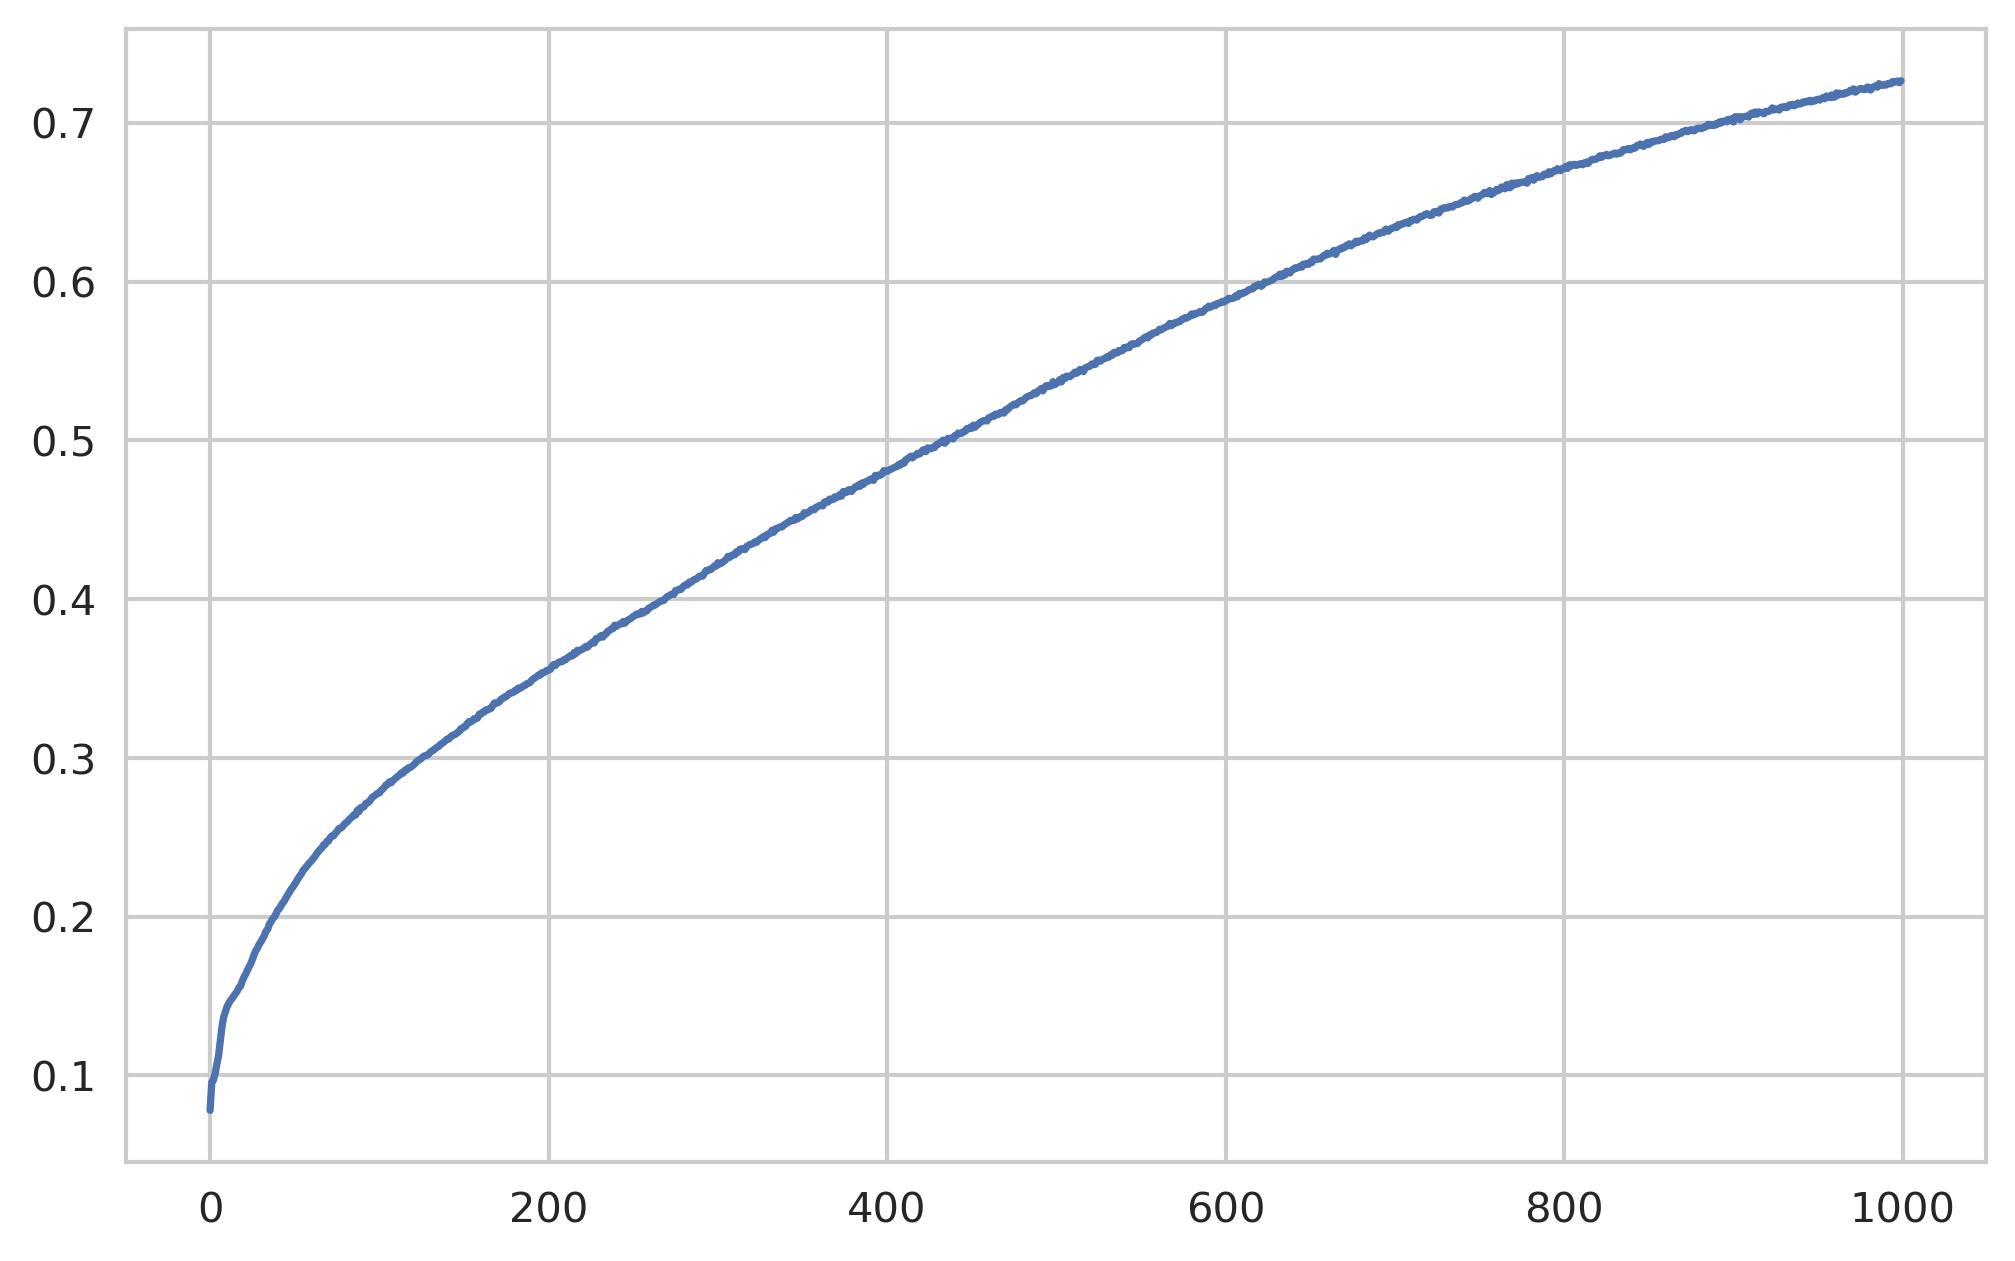

In [32]:
plt.plot(hist.history['acc'])
plt.show()

## Word2Vec

In [33]:
vectors = cbow.get_weights()[0]

In [34]:
f = open('cbow_vectors.txt' ,'w')
f.write('{} {}\n'.format(V-1, dim))
for word, i in tokenizer.word_index.items():
    str_vec = ' '.join(map(str, list(vectors[i, :])))
    f.write('{} {}\n'.format(word, str_vec))
f.close()

In [35]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('./cbow_vectors.txt', binary=False)

In [50]:
word2vec.most_similar('rabbit')

[('hatter', 0.47093451023101807),
 ('queen', 0.4295445382595062),
 ('caterpillar', 0.42325568199157715),
 ('king', 0.4147602915763855),
 ('lory', 0.4050913453102112),
 ('yet', 0.38523104786872864),
 ('gryphon', 0.3771767020225525),
 ('dormouse', 0.3750528395175934),
 ('alice', 0.3663620054721832),
 ('rat', 0.3617069125175476)]

In [49]:
word2vec.most_similar('queen')

[('rabbit', 0.4295445382595062),
 ('pigeon', 0.42947056889533997),
 ('king', 0.4093449115753174),
 ('one', 0.40173566341400146),
 ('caterpillar', 0.3969307541847229),
 ('gryphon', 0.3968861997127533),
 ('grass', 0.3665374219417572),
 ('hatter', 0.3525356948375702),
 ('roof', 0.34467756748199463),
 ('hare', 0.34423381090164185)]